# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

# Reading datasets

In [2]:
df_1718 = pd.read_csv('1718Pcard.csv')
df_1617 = pd.read_csv('PCard 1617.csv')
df_1516 = pd.read_csv('PCard Transactions 15-16.csv')
df_2014v1 = pd.read_csv('Purchasing Card Data 2014 v1.csv')

# First five rows of df_1718

In [3]:
df_1718.head()

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL CURRENCY AMOUNT,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION
0,06/04/17,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,36.55,GBP,1.0
1,06/04/17,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,58.75,GBP,1.0
2,10/04/17,11/04/17,40.50,WWW.GOJUMPIN.COM,INTERNET,40.50,GBP,1.0
3,12/04/17,13/04/17,23.90,AMFBOWLING.CO.UK,01442 840200,23.90,GBP,1.0
4,12/04/17,13/04/17,24.28,VUE BSL LTD,LONDON,24.28,GBP,1.0


# First five rows of df_1617

In [4]:
df_1617.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,05/12/2016,10510.0,45.00
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,05/12/2016,10509.0,426.57
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,06/12/2016,10524.0,121.38
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,01/03/2017,11667.0,78.94
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,01/02/2017,10974.0,97.50


# First five rows of df_1516

In [5]:
df_1516.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7


# First five rows of df_2014v1

In [6]:
df_2014v1.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,20/05/2014,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,20/05/2014,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,20/05/2014,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,20/05/2014,306


# Data Cleaning

Dropping the column JV DAte 

In [7]:
df_2014v1 = df_2014v1.drop('JV Date', axis = 1)
# Assigning same column name to three different dataframe
columns = ['Service Area', 'Account', 'Creditor', 'Journal Date', 'Journal Reference', 'Total']
df_2014v1.columns = columns
df_1516.columns = columns
df_1617.columns = columns

In [8]:
#concatenating all three dataframe with axis = 0
df = pd.concat((df_2014v1, df_1516, df_1617), axis = 0).reset_index(drop = True)
# Dropping all the duplicate values
df = df.drop_duplicates()

In [9]:
# checking the top 5 rows of dataframe after combining and dropping the duplicated values
df.head()

,Service Area,Account,Creditor,Journal Date,Journal Reference,Total
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93.0,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111.0,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6.0,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7.0,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381.0,306


In [10]:
# checking the number of rows and columns inside df_1718
print("Number of Rows:", df_1718.shape[0])
print("Number of Columns:", df_1718.shape[1])

Number of Rows: 4931
Number of Columns: 8


In [11]:
# checking the number of rows and columns inside combined dataframe

print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 12589
Number of Columns: 6


In [12]:
# checking the null value inside the combined dataframe
df.isnull().sum()

Service Area         1
Account              2
Creditor             2
Journal Date         2
Journal Reference    2
Total                0
dtype: int64

In [13]:
# checking the null value inside the df_1718
df_1718.isnull().sum()

FIN.TRANSACTION DATE                     0
FIN.POSTING DATE                         0
FIN.TRANSACTION AMOUNT                   0
MCH.MERCHANT NAME                        0
MCH.CITY NAME                            4
FIN.ORIGINAL CURRENCY AMOUNT             0
FIN.ORIGINAL ISO CURRENCY CODE SYMBOL    0
FIN.INET CONVERSION                      0
dtype: int64

In [14]:
# dropping the null value from df_1718
df.dropna(inplace = True)
df_1718.dropna(inplace = True)

In [15]:
# dropping null values from the combined dataframe
df.isnull().sum()
df_1718.isnull().sum()

FIN.TRANSACTION DATE                     0
FIN.POSTING DATE                         0
FIN.TRANSACTION AMOUNT                   0
MCH.MERCHANT NAME                        0
MCH.CITY NAME                            0
FIN.ORIGINAL CURRENCY AMOUNT             0
FIN.ORIGINAL ISO CURRENCY CODE SYMBOL    0
FIN.INET CONVERSION                      0
dtype: int64

In [16]:
# checking the first 5 rows of the dataframe
df.head()

,Service Area,Account,Creditor,Journal Date,Journal Reference,Total
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93.0,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111.0,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6.0,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7.0,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381.0,306


# Convert date strings to datetime and create quarters column


In [17]:
# Convert 'FIN.TRANSACTION DATE' column to datetime
df_1718['FIN.TRANSACTION DATE'] = pd.to_datetime(df_1718['FIN.TRANSACTION DATE'], format='%d/%m/%y')

# Create quarters column based on the transaction date
df_1718['Quarter'] = df_1718['FIN.TRANSACTION DATE'].dt.to_period('Q')

# Convert 'FIN.POSTING DATE' column to datetime
df_1718['FIN.POSTING DATE'] = pd.to_datetime(df_1718['FIN.POSTING DATE'], format='%d/%m/%y')

# checking the last 5 rows of the dataset
df_1718.tail()

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL CURRENCY AMOUNT,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION,Quarter
4926,2018-03-16,2018-03-19,20.00,GIFFGAFF,WWW.GIFFGAFF,20.00,GBP,1.0,2018Q1
4927,2018-03-07,2018-03-08,354.25,LOVE2SHOP.CO.UK,0345 717 1111,354.25,GBP,1.0,2018Q1
4928,2018-03-21,2018-03-22,51.88,AMAZON UK MARKETPLACE,800-279-6620,51.88,GBP,1.0,2018Q1
4929,2018-03-22,2018-03-26,10.00,WWW.BRENTGOV.UK,INTERNET,10.00,GBP,1.0,2018Q1
4930,2018-03-27,2018-03-28,11.00,LUTON BC INTERNET,LUTON,11.00,GBP,1.0,2018Q1


In [18]:
# Convert 'Journal Date' column to datetime
df['Journal Date'] = pd.to_datetime(df['Journal Date'], format='%d/%m/%Y')

# Create quarters column based on the Journal Date
df['Quarter'] = df['Journal Date'].dt.to_period('Q')

# checking the last 5 rows of the dataset
df.tail()

,Service Area,Account,Creditor,Journal Date,Journal Reference,Total,Quarter
12583,Streetscene,Vehicle Running Costs,WWW.DVLA.GOV.UK,2016-08-23,9211.0,232.50,2016Q3
12584,Streetscene,Vehicle Running Costs,WWW.DVLA.GOV.UK,2016-08-23,9212.0,232.50,2016Q3
12585,Streetscene,Vehicle Running Costs,WWW.DVLA.GOV.UK,2016-08-23,9213.0,167.50,2016Q3
12586,Streetscene,Vehicle Running Costs,WWW.DVLA.GOV.UK,2016-08-25,9248.0,232.50,2016Q3
12587,Streetscene,Vehicle Running Costs,WWW.MOT-TESTING-CP,2016-11-25,10384.0,68.00,2016Q4


In [19]:
# replacing the frequent occurance Streetscene with Street Scene in column Service Area
df['Service Area'] = df['Service Area'].str.replace("Streetscene", "Street Scene")

# Capitalizing the first letter inside the column creditor
df['Creditor'] = df['Creditor'].str.title()

# converting the type of Journal Reference to str
df['Journal Reference'] = df['Journal Reference'].astype(str) 

#checking the first 5 rows of dataset
df.head()

,Service Area,Account,Creditor,Journal Date,Journal Reference,Total,Quarter
0,Childrens Services,IT Services,123-Reg.Co.Uk,2014-04-23,93.0,143.81,2014Q2
1,Childrens Services,Other Services,Access Expeditions,2014-04-03,111.0,"6,000.00",2014Q2
2,Childrens Services,Equipment and Materials Repair,Afe Serviceline,2014-04-02,6.0,309.38,2014Q2
3,Childrens Services,Equipment and Materials Repair,Afe Serviceline,2014-04-02,7.0,218.76,2014Q2
4,Childrens Services,Building Repairs & Maintenance,Allsop & Francis,2014-04-15,381.0,306,2014Q2


# Summary of Transaction Amounts

In [20]:
# calculating descriptive statistics for a DataFrame df
df['Total'].describe()

count     12587
unique     6290
top          20
freq        309
Name: Total, dtype: object

In [21]:
# calculating descriptive statistics for a DataFrame df_1718
df_1718['FIN.TRANSACTION AMOUNT'].describe()

count      4927
unique     2831
top       20.00
freq        276
Name: FIN.TRANSACTION AMOUNT, dtype: object

# Summary of Other Data

In [22]:
# Calculate the required statistics in a single step using agg()
summary_stats = df.agg({
    'Quarter': 'nunique',                            
    'Journal Date': ['min', 'max'],                   
    'Creditor': 'nunique'                             
})

# Print the summary statistics
print("\tNumber of quarters =", summary_stats['Quarter'])
print("\tJournal Dates")
print("\t\tEarliest =", summary_stats['Journal Date']['min'].strftime('%Y-%b-%d'))
print("\t\tLatest =", summary_stats['Journal Date']['max'].strftime('%Y-%b-%d'))
print("\tNumber of creditors =", summary_stats['Creditor'])


	Number of quarters = nunique    13.0
min         NaN
max         NaN
Name: Quarter, dtype: float64
	Journal Dates
		Earliest = 2014-Apr-02
		Latest = 2017-Apr-03
	Number of creditors = nunique    1931.0
min           NaN
max           NaN
Name: Creditor, dtype: float64


In [23]:
# Calculate the number of unique merchants
num_quarters = df['Quarter'].nunique()
num_merchants = df_1718['MCH.MERCHANT NAME'].nunique()

earliest_date = df['Journal Date'].min().strftime('%Y-%b-%d')
latest_date = df['Journal Date'].max().strftime('%Y-%b-%d')

# Print the summary statistics
print("\tNumber of quarters =", num_quarters)
print("\tTransaction Dates")
print("\t\tEarliest =", earliest_date)
print("\t\tLatest =", latest_date)
print("\tNumber of merchants =", num_merchants)

	Number of quarters = 13
	Transaction Dates
		Earliest = 2014-Apr-02
		Latest = 2017-Apr-03
	Number of merchants = 928


# Summary Graphs and Tables

In [24]:

# Remove non-numeric characters and convert to numeric
df['Total'] = df['Total'].str.replace(',', '').astype(float)


# grouping the dataframe df by 'Service Area' column with 'Total' which contains agg of count and mean 
table = df.groupby(['Service Area']).agg({'Total': ['count', 'mean']  }).rename(columns={'count': 'Transaction Count', 'mean': 'Average'})

#printing table
table

Total             
                               Transaction Count      Average
Service Area                                                 
Adults and Communities                       278   174.245791
Assurance                                    344    60.090698
CSG Managed Budget                            36  1971.842778
Children's Education & Skills                667    97.230255
Children's Family Services                  7672    68.223004
Children's Service DSG                       277   116.708556
Childrens Services                          1297    70.626245
Commercial                                     9   304.783333
Commissioning                                400   142.462600
Control Accounts                               8    23.838750
Customer Support Group                       117  1601.541538
Deputy Chief Operating Officer               113    36.888319
Education                                     95   134.896211
Family Services                              770    62.309078
Governance                                     8  1780.312500
HRA                                            1   289.940000
Internal Audit & CAFT                         11    65.104545
NSCSO                                          3   151.833333
Parking & Infrastructure                      12   388.341667
Public Health                                  3     0.733333
Regional Enterprise                            6   371.500000
Strategic Commissioning Board                  1   244.000000
Street Scene                                 459   150.522418

In [25]:
# checking the number columns name of dataframe df
df.columns

Index(['Service Area', 'Account', 'Creditor', 'Journal Date',
       'Journal Reference', 'Total', 'Quarter'],
      dtype='object')

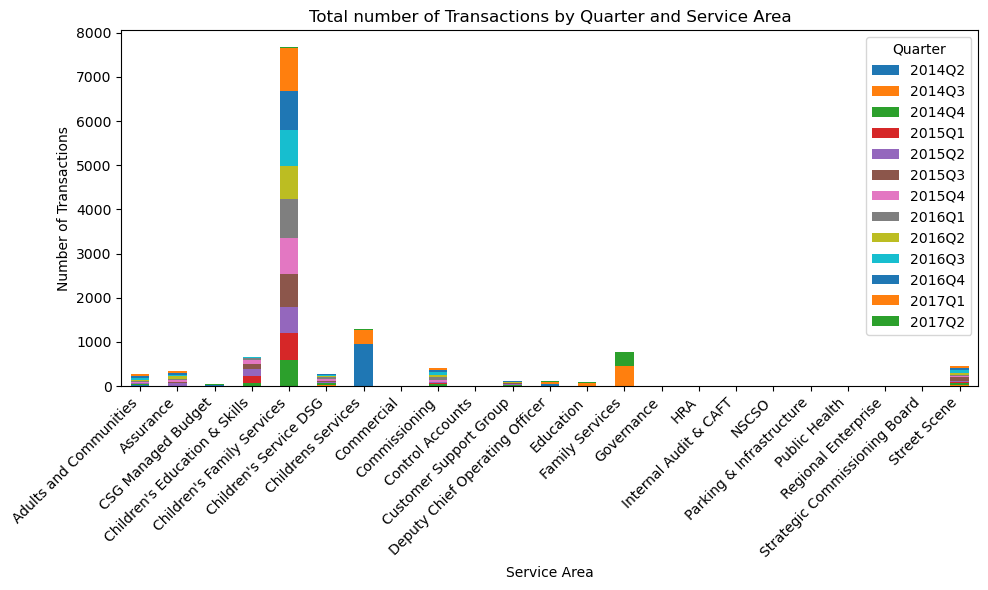

In [26]:
# grouping two columns('Service Area','Quarter') of dataframe df and assigning it to a new variable new_df
new_df = df.groupby(['Service Area', 'Quarter']).size().unstack(fill_value=0)

# defining the figure size to plot
fig, ax = plt.subplots(figsize=(10, 6)) 

new_df.plot(kind='bar', stacked=True, ax=ax)

# giving the title for the graph also for xlabel and y-label
plt.title('Total number of Transactions by Quarter and Service Area')
plt.xlabel('Service Area')
plt.ylabel('Number of Transactions')

# rotating the label in x-axis
plt.xticks(rotation=45, ha='right')
# giving title to legend
plt.legend(title='Quarter')

plt.tight_layout()
plt.show()


# For dataframe df_1718

In [27]:
# renaming column MCH.CITY NAME in dataframe df_1718 with 'Service Area'
df_1718.rename(columns={'MCH.CITY NAME': 'Service Area'}, inplace=True)

# converting the values in the 'FIN.TRANSACTION AMOUNT' column of the DataFrame df_1718 to floating-point numbers by removing commas from the string 
df_1718['FIN.TRANSACTION AMOUNT'] = df_1718['FIN.TRANSACTION AMOUNT'].apply(lambda x: float(str(x).replace(',', '')))


# Summary table
table = df_1718.groupby(['Service Area', 'Quarter']).agg({
    'FIN.TRANSACTION AMOUNT': ['count', 'mean']  
}).rename(columns={'count': 'Transaction Count', 'mean': 'Average Transaction Amount'})

# displaying the table
table

FIN.TRANSACTION AMOUNT                           
                           Transaction Count Average Transaction Amount
Service Area  Quarter                                                  
-             2017Q2                       1                  50.480000
              2017Q3                       1                  28.320000
.             2017Q2                      14                 242.349286
              2017Q3                       6                 294.661667
              2017Q4                       4                 189.742500
...                                      ...                        ...
WWW.FB.ME/ADS 2017Q3                       1                  28.310000
WWW.GIFFGAFF  2017Q4                       3                  10.000000
              2018Q1                       9                  10.000000
WWW.MOONPIG.C 2018Q1                       1                  15.970000
WWW.THENORTHF 2017Q4                       1                 175.000000

[880 rows x 2 columns]

# 2. Significant Changes in Spending Behavior

Spikes

In [28]:
# Calculate account sums by quarter using groupby and pivot_table
sum_by_quaters = df.groupby(['Account', 'Quarter'])['Total'].sum().unstack(fill_value=0)

# Calculate area sums by quarter
Area_sum_quaters = df.groupby(['Service Area', 'Quarter'])['Total'].sum().unstack(fill_value=0)

In [29]:

# Calculate quarterly means and variances for areas
Area_sum_quaters_m = Area_sum_quaters.mean(axis=1).values.reshape(-1, 1)
Area_sum_quaters_v = Area_sum_quaters.var(axis=1).values.reshape(-1, 1)

# Calculate quarterly means and variances for accounts
sum_by_quaters_m = sum_by_quaters.mean(axis=1).values.reshape(-1, 1)
sum_by_quaters_v = sum_by_quaters.var(axis=1).values.reshape(-1, 1)


# Spikes for service area

In [30]:
# assigning the unique value of the 'service Area' in a datafram df to a variable called service_areas
service_areas = np.unique(df['Service Area'])

# calculating the length of service_areas and assigning it to a variable called num_service_areas
num_service_areas = len(service_areas)

#printing a comma-separated string containing unique service areas
print (','.join(service_areas))

Adults and Communities,Assurance,CSG Managed Budget,Children's Education & Skills,Children's Family Services,Children's Service DSG,Childrens Services,Commercial,Commissioning,Control Accounts,Customer Support Group,Deputy Chief Operating Officer,Education,Family Services,Governance,HRA,Internal Audit & CAFT,NSCSO,Parking & Infrastructure,Public Health,Regional Enterprise,Strategic Commissioning Board,Street Scene


In [31]:
# Defining the floats' display format.
pd.options.display.float_format = '{:,.2f}'.format

# initializing an empty list
spikes = []

#obtaining unique characters
quarters = np.unique(df['Quarter'])

# Using loops in num_service_areas and num_quarters
for index in range(num_service_areas):
    for qtr in range(num_quarters):
# calculating z-score
        z_score = float((Area_sum_quaters.iloc[index, qtr] - Area_sum_quaters_m[index]) \
                    / np.power(Area_sum_quaters_v[index], 0.5))
# Checking if z-score is greater than 2
        if z_score > 2:
            spikes.append((service_areas[index], quarters[qtr], Area_sum_quaters.iloc[index, qtr], z_score))

# Creating a DataFrame from the spikes list
spikes_df = pd.DataFrame(spikes, columns = ['Service Area', 'Quarter', 'Transaction Sum', 'SDs from Average'])

# displaying the spike list
display(spikes_df.sort_values(by = 'SDs from Average', ascending = False).reset_index(drop = True))

,Service Area,Quarter,Transaction Sum,SDs from Average
0,Control Accounts,2014Q2,190.71,3.33
1,Strategic Commissioning Board,2014Q2,244.00,3.33
2,HRA,2016Q4,289.94,3.33
3,Commercial,2014Q3,"2,743.05",3.33
4,NSCSO,2014Q3,445.50,3.33
5,Governance,2014Q2,"13,011.60",3.31
6,Parking & Infrastructure,2016Q4,"3,568.25",3.29
7,Regional Enterprise,2015Q4,"1,645.00",3.27
8,Childrens Services,2014Q2,"66,339.06",3.12
9,Assurance,2016Q2,"9,510.24",3.04


# Spikes for accounts

In [32]:
# obtaining the unique value of 'Account' column in the dataframe df and assigning it to a new variable called unique_accounts
unique_accounts = df['Account'].nunique()

#obtaining unique characters
accounts = np.unique(df['Account'])

# Defining the floats' display format.
pd.options.display.float_format = '{:,.2f}'.format

# initializing an empty list
spikes = []

# iterating on unique_accounts and num_quarters
for index in range(unique_accounts):
    for qtr in range(num_quarters):
# calculating z-score
        z_score = float((sum_by_quaters.iloc[index, qtr] - sum_by_quaters_m[index]) \
                    / np.power(sum_by_quaters_v[index], 0.5))
# checking if the value of z-score is greater than 2
        if z_score > 2.0:
            spikes.append((accounts[index], quarters[qtr], sum_by_quaters.iloc[index, qtr], z_score))

# Creating a DataFrame from the spikes list
spikes_df = pd.DataFrame(spikes, columns=['Account', 'Quarter', 'Transaction Sum', 'SDs from Average'])

# displaying the spike list
display(spikes_df.sort_values(by='SDs from Average', ascending=False).reset_index(drop=True))


,Account,Quarter,Transaction Sum,SDs from Average
0,NNDR Collected,2016Q2,4.10,3.33
1,Advertising for staff,2016Q2,450.00,3.33
2,Catering Recharge,2016Q1,100.00,3.33
3,Counsels Fees,2016Q1,"1,200.00",3.33
4,Software Purchases,2017Q1,288.41,3.33
5,Clothing - Uniforms,2014Q3,107.50,3.33
6,Grant Payments,2015Q3,660.00,3.33
7,Employer's National Insurance,2015Q4,6.67,3.33
8,Furniture-Purchase-Repair,2015Q4,"3,984.00",3.33
9,Consultants Fees,2016Q2,900.00,3.32


# Permanent Change

Service areas

In [33]:
#initalizing an empty list call changes
changes = []

# using for loop for num_service_areas and for qtr ranging
for area in range(num_service_areas):
    for qtr in range(1, num_quarters - 1):
# calculating sum of value before mean
        before_mean = Area_sum_quaters.iloc[area, :(qtr + 1)].mean()
    
# calculating sum of value after mean
        after_mean = Area_sum_quaters.iloc[area, (qtr + 1):].mean()
    
#calculating variance and mean
        var = Area_sum_quaters.iloc[area, 1:].var()
        means_diff = after_mean - before_mean
        
# Check if variance is zero to avoid division by zero
        if var == 0:
            z_score = np.nan
        else:
            z_score = means_diff / np.sqrt(var)
        
# flag positive changes where long-term averages increase by more than 1 SD
        if not np.isnan(z_score) and z_score > 1 and Area_sum_quaters.iloc[area, qtr] < Area_sum_quaters.iloc[area, (qtr + 1)]:
            changes.append((service_areas[area], quarters[qtr + 1], before_mean, after_mean, z_score))
            
#creating a new dataframe and displaying the changed datafram where old average should be greater than 0
changes_df = pd.DataFrame(changes, columns=['Service Area', 'After Quarter', 'Old Average', 'New Average', 'SDs Change'])
changes_df = changes_df[changes_df['Old Average'] > 0]
display(changes_df.reset_index(drop=True))


,Service Area,After Quarter,Old Average,New Average,SDs Change
0,Adults and Communities,2016Q2,"2,459.55","5,752.78",1.09
1,Adults and Communities,2016Q3,"2,592.85","6,276.17",1.22
2,Adults and Communities,2016Q4,"3,007.81","6,120.76",1.03
3,Children's Family Services,2015Q1,"11,169.57","48,989.82",1.63
4,Children's Family Services,2015Q2,"18,341.82","50,004.40",1.37
5,Children's Family Services,2015Q3,"23,300.89","50,862.81",1.19
6,Commissioning,2015Q1,"1,141.80","5,355.96",1.32
7,Commissioning,2015Q3,"2,278.23","5,699.24",1.07
8,Commissioning,2015Q4,"2,465.50","6,027.44",1.12
9,Customer Support Group,2015Q1,"1,791.77","18,200.50",1.56


Accounts

In [34]:
#initalizing an empty list call changes
changes = []

# using for loop for unique_accounts and for qtr ranging
for account in range(unique_accounts):
    for qtr in range(1, num_quarters - 1):

# calculating sum of value before mean        
        before_mean = sum_by_quaters.iloc[account, :(qtr + 1)].mean()
    
# calculating sum of value after mean
        after_mean = sum_by_quaters.iloc[account, (qtr + 1):].mean()
    
#calculating variance and mean
        var = sum_by_quaters.iloc[account, 1:].var()

#Calculating the differnce
        means_diff = after_mean - before_mean
        
# Calculate z-score, handling division by zero
        if var == 0:
            z_score = np.nan
        else:
            z_score = means_diff / np.sqrt(var)
        
# Flag positive changes where long-term averages increase by more than 1 SD
        if not np.isnan(z_score) and z_score > 1 and sum_by_quaters.iloc[account, qtr] < sum_by_quaters.iloc[account, (qtr + 1)]:
            changes.append((accounts[account], quarters[qtr + 1], before_mean, after_mean, z_score))
            
#creating a new dataframe and displaying the changed datafram where new average should be greater than 0
changes_df = pd.DataFrame(changes, columns=['Account', 'Starting Quarter', 'Old Average', 'New Average', 'SDs Change'])
changes_df = changes_df[changes_df['New Average'] > 0]
display(changes_df.reset_index(drop=True))


,Account,Starting Quarter,Old Average,New Average,SDs Change
0,CSG - IT,2016Q4,0.00,85.80,1.66
1,CSG - IT,2017Q1,8.86,79.95,1.37
2,Conference Expenses,2015Q3,259.36,"1,201.70",1.11
3,Conference Expenses,2015Q4,327.80,"1,277.65",1.11
4,Conference Expenses,2016Q1,415.40,"1,333.76",1.08
5,Electricity,2016Q4,21.99,"1,787.39",1.47
6,Electricity,2017Q1,135.09,"2,048.03",1.60
7,Gas,2016Q2,0.00,589.42,1.12
8,General Office Expenses,2015Q1,43.33,888.62,1.20
9,General Office Expenses,2015Q2,47.50,980.68,1.33


# Classifying Creditors to Accounts

In [35]:
#grouping two columns 'Creditor' and 'Account' and count occurence
creditor_account = df.groupby(['Creditor', 'Account']).size().reset_index(name='Count')

#filtering creditors with multiple account
multiple_account = creditor_account.groupby('Creditor').filter(lambda x: len(x) > 1)

# printing the table
multiple_account

,Creditor,Account,Count
14,123-Reg.Co.Uk,IT Services,1
15,123-Reg.Co.Uk,Subscriptions,1
21,99P Stores Ltd,E19 - Learning Resources,1
22,99P Stores Ltd,Equipment and Materials Purcha,2
24,A&Y Locksmiths,Clothing - Protective Clothing,1
...,...,...,...
2853,Www.Yellowmoon.Org.Uk,Other Services,1
2855,Www.Zatpay.Com,IT Services,1
2856,Www.Zatpay.Com,Other Services,2
2864,Zahra Newsagent,Books-CDs-Audio-Video,1


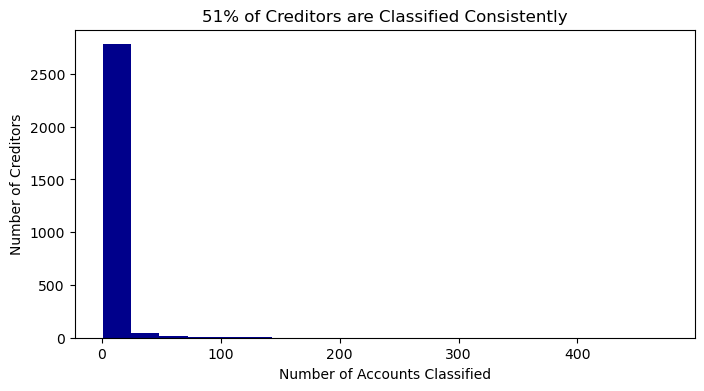

In [36]:
# calculating final value by calculating percentage of creditors classified consistently
final = 100 - int(round(multiple_account.shape[0] / float(creditor_account.shape[0]) * 100))

# plotting histogram
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(creditor_account['Count'], bins=20, color='darkblue')

# giving titles
ax.set_xlabel("Number of Accounts Classified")
ax.set_ylabel("Number of Creditors")
ax.set_title(str(final) + "% of Creditors are Classified Consistently")
plt.show()


# Grouping Service Area

The study analyzed spending patterns in service areas using k-means clustering, an algorithm for grouping objects. Four groups were identified:
1: which had few small transactions per area,

2: which had many small transactions,

3: which had a small number of large transactions, and 

4: which had a moderate number of small transactions per area. The goal was to find groups that shared similar transaction averages but varied slightly on other attributes.

In [37]:
# Group data by 'Service Area' and calculate count and mean of transactions
area_counts = df.groupby('Service Area')['Total'].count().values.reshape(-1, 1)
area_means = df.groupby('Service Area')['Total'].mean().values.reshape(-1, 1)


In [38]:
# concatenating area_counts and area_means to fit on the model
predictors = np.concatenate((area_counts, area_means), axis = 1)

In [39]:
# defining the value of k
n_clusters = 4

# create and fit K-means model

model = KMeans(n_clusters = n_clusters)
predict = model.fit_predict(predictors)
cluster_centers = model.cluster_centers_

# defining new columns filled with zero values
new_column = np.zeros(df.shape[0]).reshape(-1, 1)

# iterating over num_service_areas to calculate cluster prediction for each areas
for index in range(num_service_areas):

    area_name = service_areas[index]
    area_indexes = np.where(df['Service Area'] == area_name)
    new_column[area_indexes] = predict[index]
# creating a new dataframe and concatenating it with the original dataframe   
new_column_df = pd.DataFrame(new_column, columns = ['Cluster'])
data = pd.concat((df, new_column_df), axis = 1)

In [40]:
# concatenating  cluster prediction and service areas 
results = np.concatenate((predict.reshape(-1, 1), service_areas.reshape(-1, 1)), axis = 1)

# creating a new dataframe with clusters
results_df = pd.DataFrame(results, columns = ['Cluster', 'Service Area'])

# grouping cluster with result_df
clusters = results_df.groupby('Cluster')

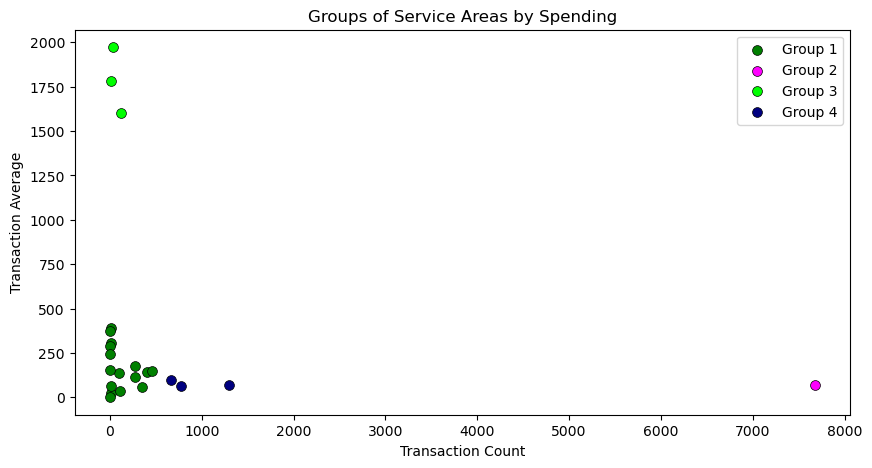

In [41]:
### plot clusters
colors = ['g', 'Magenta', 'Lime', 'Navy']


fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)

#iterating on over_cluster
for cluster in range(n_clusters):
# calculating cluster count and cluster_mean on the basis of the cluster
    cluster_counts = area_counts[predict == cluster]
    cluster_means = area_means[predict == cluster]
# plotting scatter plot
    ax.scatter(cluster_counts, cluster_means, color = colors[cluster], s = 50,
               edgecolor = 'black', linewidth = 0.5, label = 'Group ' + str(cluster + 1))

# giving title and also to x-label and y-label
ax.set_xlabel("Transaction Count")
ax.set_ylabel("Transaction Average")
ax.set_title("Groups of Service Areas by Spending")
ax.legend(loc = 'best')

plt.show()

In [42]:
#initializing an empty dictionary called cluster_dict
cluster_dict = {}

# iterating over cluster
for cluster, areas in clusters:

    count = areas.shape[0]  
    areas_list = list(areas)
#storing cluster in the dictionary
    cluster_dict[cluster] = {'Count': count, 'Areas': areas_list}  

# printing all the cluster dictionaries
for cluster, info in cluster_dict.items():
    print(f"GROUP {cluster + 1} (Center: Count = {info['Count']}, Average = £{cluster_centers[cluster, 1]:.2f})")
    print("\t" + "\n\t".join(info['Areas']))
    print()


GROUP 1 (Center: Count = 16, Average = £165.99)
	Cluster
	Service Area

GROUP 2 (Center: Count = 1, Average = £68.22)
	Cluster
	Service Area

GROUP 3 (Center: Count = 3, Average = £1784.57)
	Cluster
	Service Area

GROUP 4 (Center: Count = 3, Average = £76.72)
	Cluster
	Service Area



# 5. Anomaly Detection

In [43]:
# assigining minimum transaction to 5
transaction_min = 5

#initializing an empty variable for transaction_many and transaction_few
transaction_many = []
transaction_few = []

# using for loop on unique value of 'Service Area'
for area_name in data['Service Area'].unique():
    
    num_trans = data[data['Service Area'] == area_name].shape[0]
# checking if the munber of transaction is less than minimum transaction
    if num_trans < transaction_min:

        transaction_few.append((area_name, num_trans))
    else:

        transaction_many.append((area_name, num_trans))

# Convert lists to DataFrames
transaction_many_df = pd.DataFrame(transaction_many, columns=['Service Area', 'Number of Transactions'])
transaction_few_df = pd.DataFrame(transaction_few, columns=['Service Area', 'Number of Transactions'])

# Display the DataFrame containing service areas with fewer than 5 transactions
display(transaction_few_df.reset_index(drop=True))

,Service Area,Number of Transactions
0,Public Health,3
1,NSCSO,3
2,Strategic Commissioning Board,1
3,HRA,1
4,NaN,0


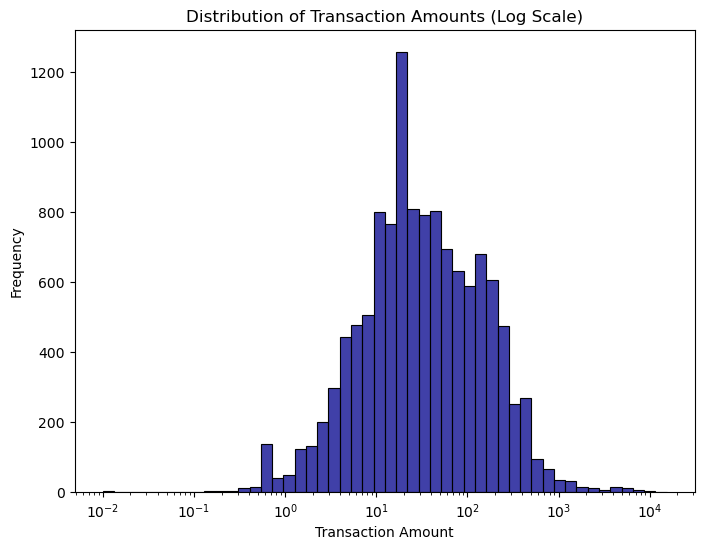

In [44]:
# defining a variable which only consists of the value of total greater than 0
final = data[data['Total'] > 0]

# plotting histogram
plt.figure(figsize=(8, 6))
sns.histplot(final['Total'], bins=50, color='darkblue', log_scale=True)
plt.title("Distribution of Transaction Amounts (Log Scale)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


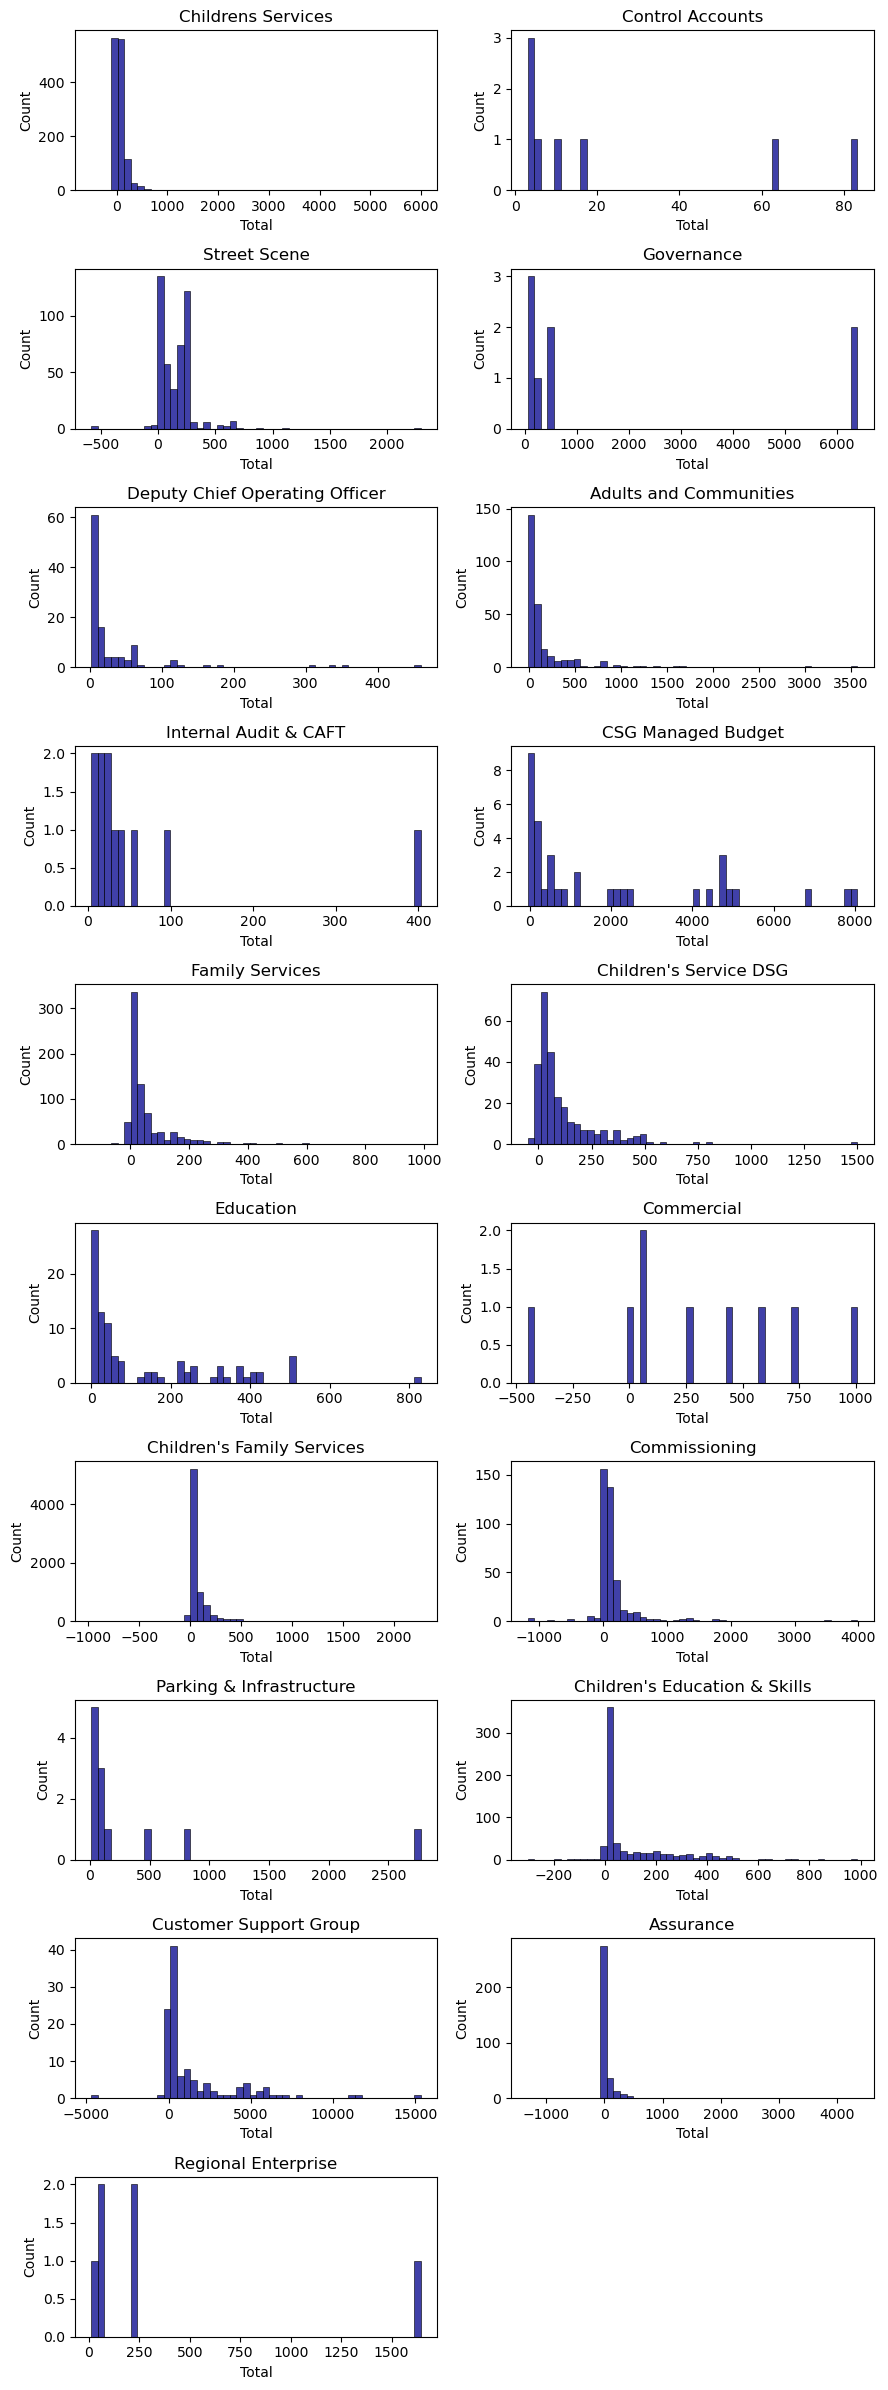

In [45]:
num_areas = transaction_many_df.shape[0]
fig, ax_ar = plt.subplots((num_areas // 2) + (num_areas % 2), 2, figsize=(9, 24))
# iterating over num_areas
for index in range(num_areas):
    area = transaction_many_df.iloc[index, 0]
    area_data = data[data['Service Area'] == area]['Total']
# plotting histogram
    sns.histplot(area_data, bins=50, color='darkblue', ax=ax_ar[index // 2, index % 2])
    ax_ar[index // 2, index % 2].set_title(area)

# Hide the last subplot if the number of areas is odd
if num_areas % 2 != 0:
    ax_ar[-1, -1].axis('off')

plt.tight_layout()
plt.show()


# Some extra visualization

Using Kernel Density Estimation plot for total transaction in Service areas, with a legend if there are unique service areas.

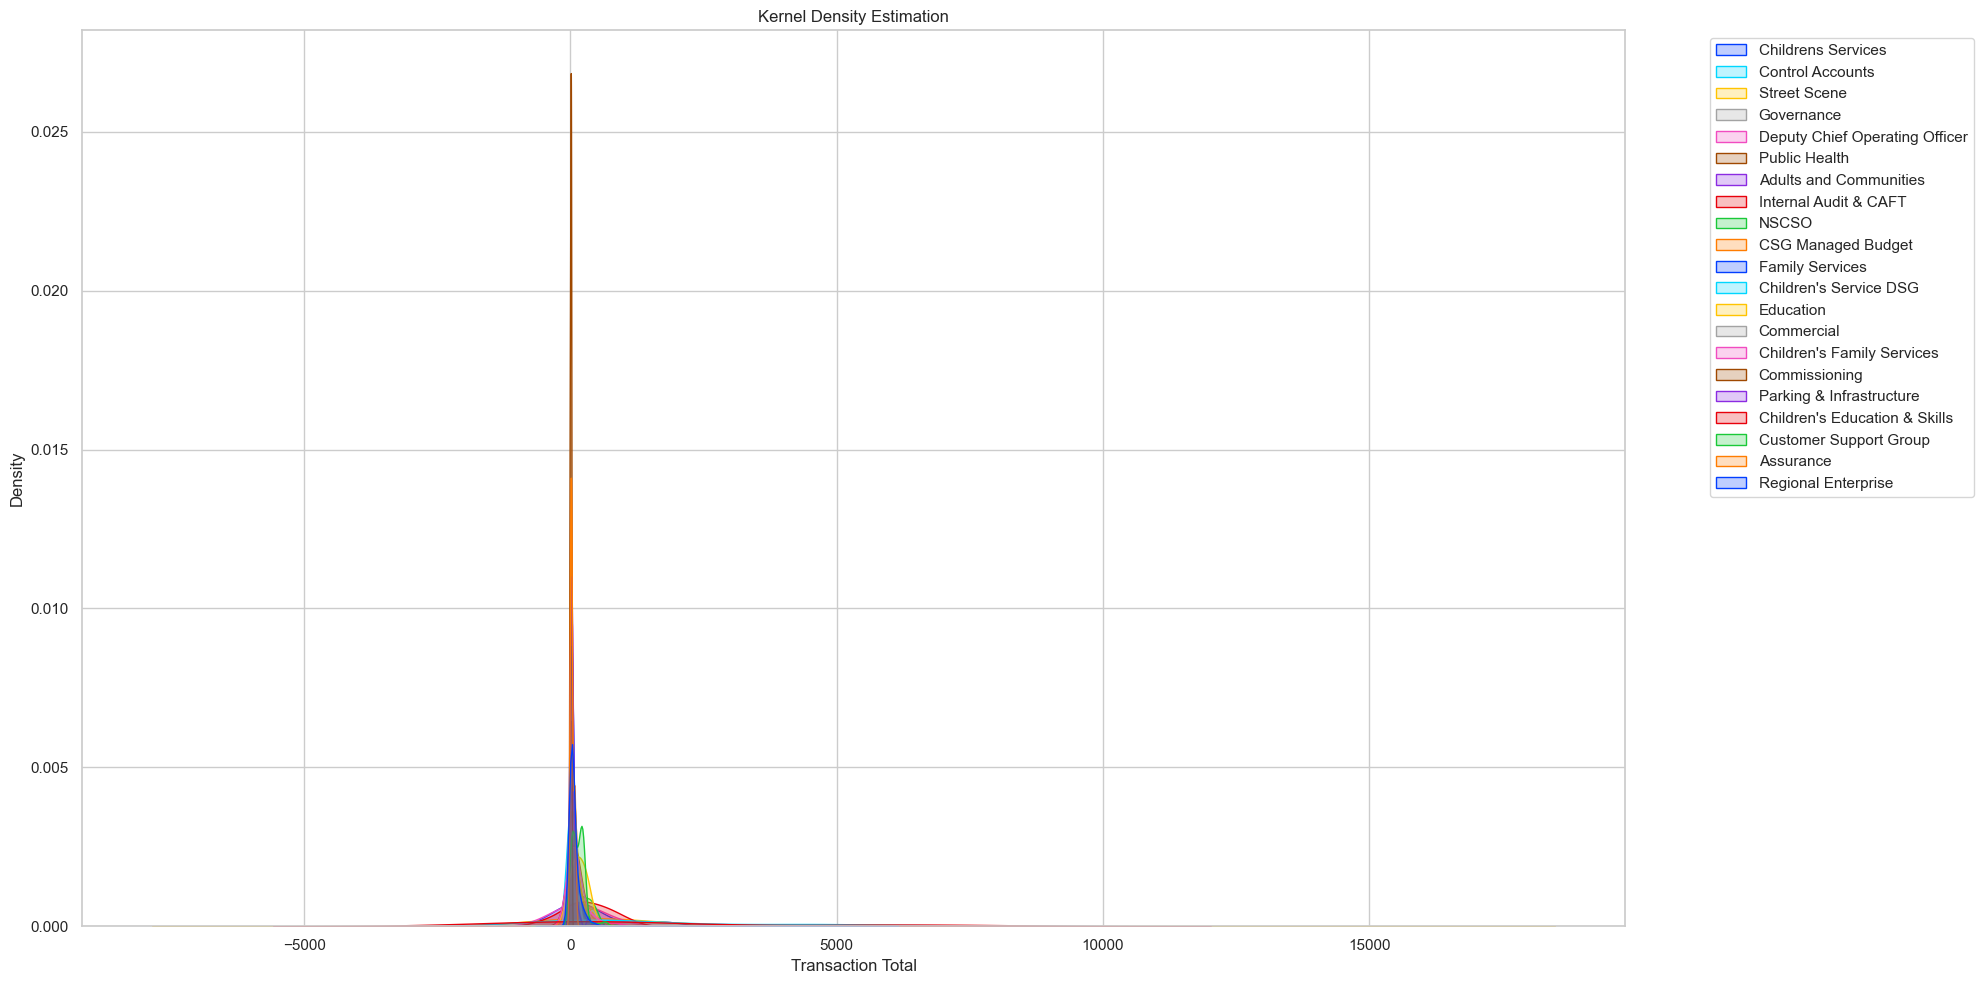

In [56]:
# Filtering service areas with zero variance
filtered_data = data.groupby('Service Area').filter(lambda x: x['Total'].var() > 0)

# Create the KDE plot
plt.figure(figsize=(20, 10))
sns.kdeplot(data=filtered_data, x='Total', hue='Service Area', fill=True, common_norm=False, palette='bright')

plt.title('Kernel Density Estimation')
plt.xlabel('Transaction Total')
plt.ylabel('Density')

# Extracting unique service areas
unique_services = filtered_data['Service Area'].unique()

# checking if there are unique service areas
if len(unique_services) > 0:
    plt.legend(labels=unique_services, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Boxplot for the distribution of transactions within a specific service area.

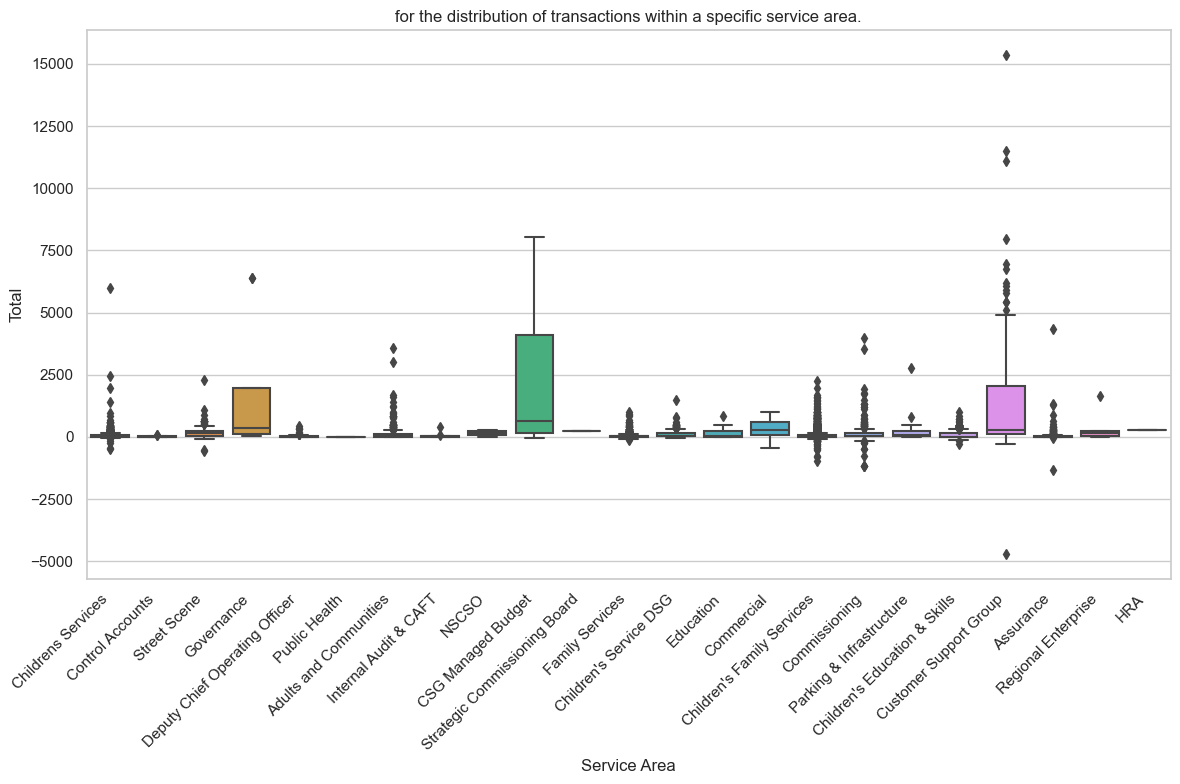

In [59]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=data, x='Service Area', y='Total')

plt.title('for the distribution of transactions within a specific service area.')
plt.xlabel('Service Area')
plt.ylabel('Total')

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjusting layout 
plt.tight_layout()

# Showing the plot
plt.show()